In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [14]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


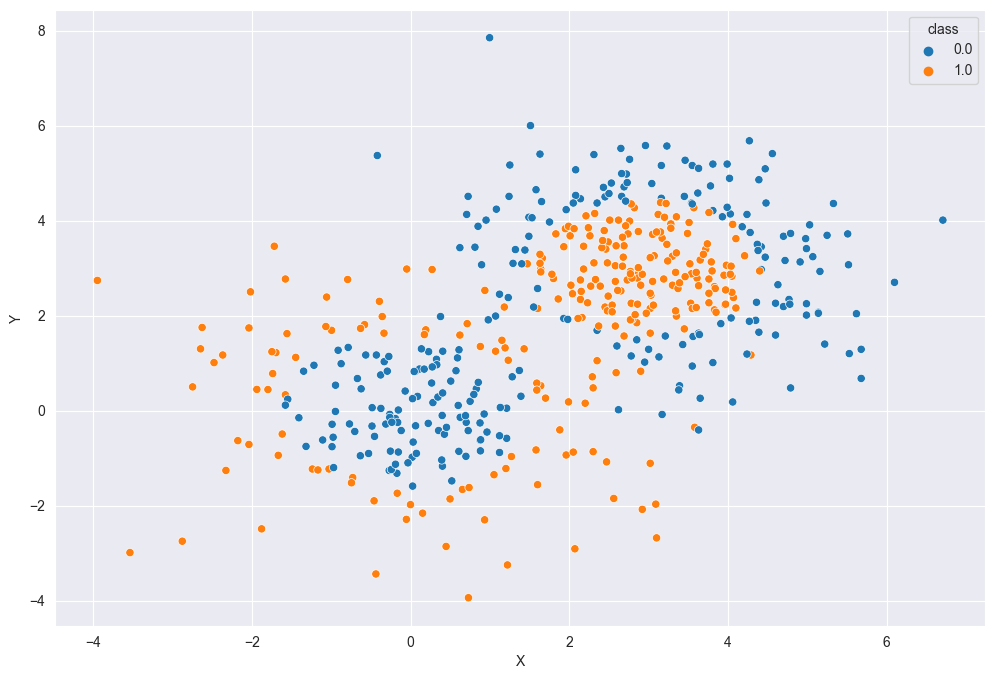

In [15]:
sns.scatterplot(x=circ['X'], y=circ['Y'], hue=circ['class']);

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

In [16]:
X = circ.drop('class', axis=1)
Y = circ["class"]

In [17]:
from sklearn.linear_model import LogisticRegression, LinearRegression

model = LogisticRegression()

model.fit(X, Y)

### Your code is here


print(f"Accuracy: {np.mean(model.predict(X) == Y).round(3)}")

Accuracy: 0.424


<AxesSubplot: xlabel='X', ylabel='Y'>

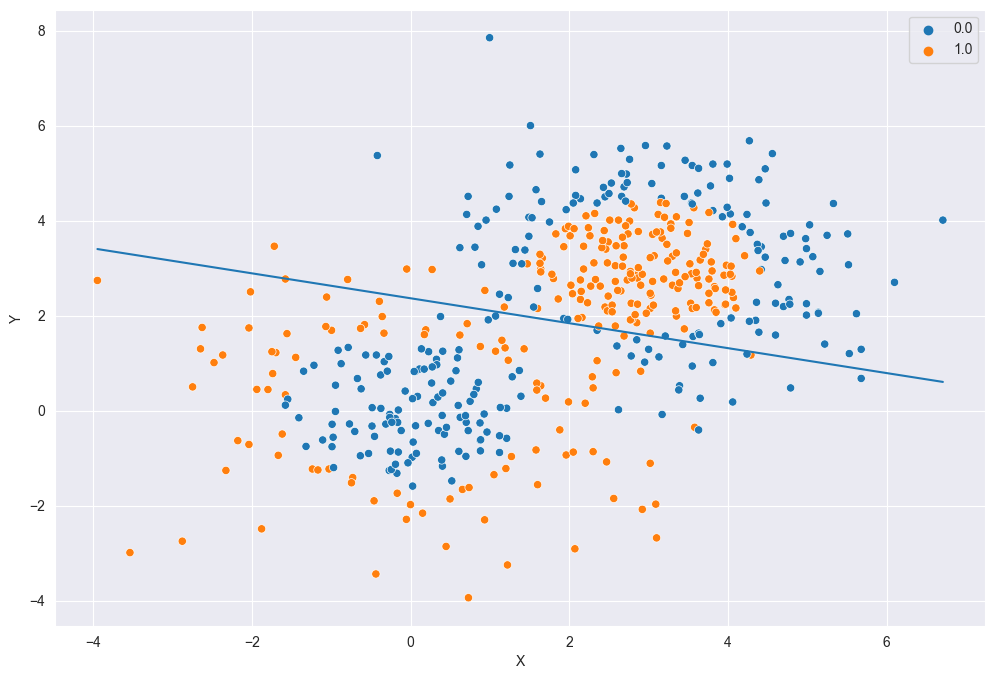

In [18]:
sns.scatterplot(x=circ['X'], y=circ['Y'], hue=circ['class'])
sns.lineplot(x=circ['X'], y = (- ((model.coef_.T[0]) / (model.coef_.T[1])) * circ['X'] ) - (model.intercept_[0] /model.coef_.T[1]))

In [19]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot: >

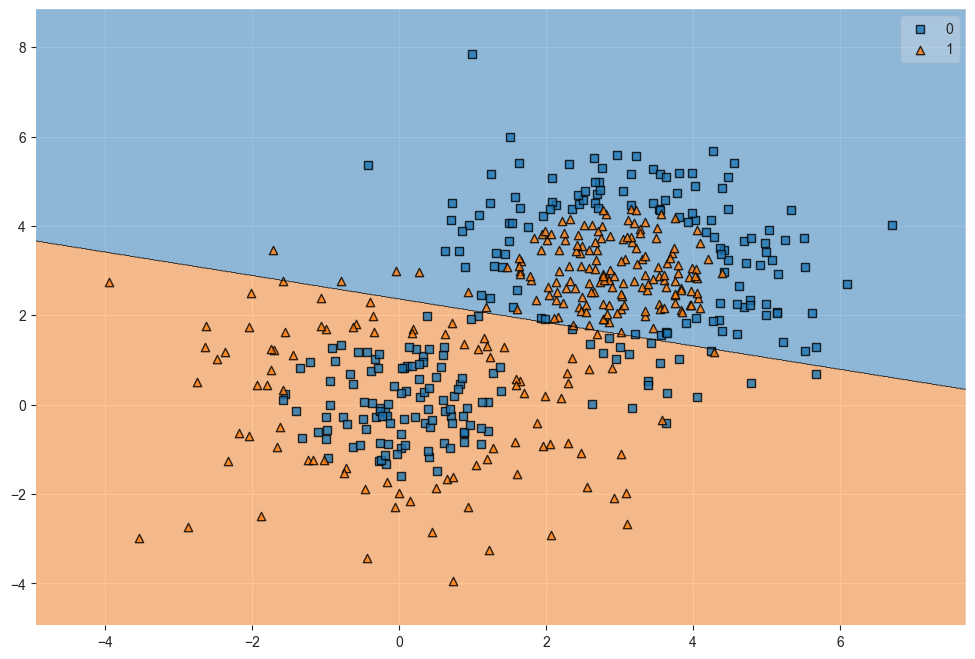

In [20]:
plot_decision_regions(X=np.array(X), y=np.array(Y, dtype = "int"), clf=model)

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [21]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
all_k = [1, 3, 10, 30, 40, 60]
classifier = []
for i in all_k:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    classifier.append(model)
    print(f"Accuracy train для {i} соседей: {np.mean(model.predict(X_train) == y_train).round(3)}")
    print(f"Accuracy test для {i} соседей: {np.mean(model.predict(X_test) == y_test).round(3)}")

Accuracy train для 1 соседей: 1.0
Accuracy test для 1 соседей: 0.89
Accuracy train для 3 соседей: 0.948
Accuracy test для 3 соседей: 0.87
Accuracy train для 10 соседей: 0.915
Accuracy test для 10 соседей: 0.85
Accuracy train для 30 соседей: 0.852
Accuracy test для 30 соседей: 0.74
Accuracy train для 40 соседей: 0.8
Accuracy test для 40 соседей: 0.75
Accuracy train для 60 соседей: 0.692
Accuracy test для 60 соседей: 0.73


**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [24]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

In [35]:
gs = gridspec.GridSpec(3, 3)

for i in itertools.product([0, 1, 2], repeat=2):
    print(gs[i[0], i[1]])

GridSpec(3, 3)[0:1, 0:1]
GridSpec(3, 3)[0:1, 1:2]
GridSpec(3, 3)[0:1, 2:3]
GridSpec(3, 3)[1:2, 0:1]
GridSpec(3, 3)[1:2, 1:2]
GridSpec(3, 3)[1:2, 2:3]
GridSpec(3, 3)[2:3, 0:1]
GridSpec(3, 3)[2:3, 1:2]
GridSpec(3, 3)[2:3, 2:3]


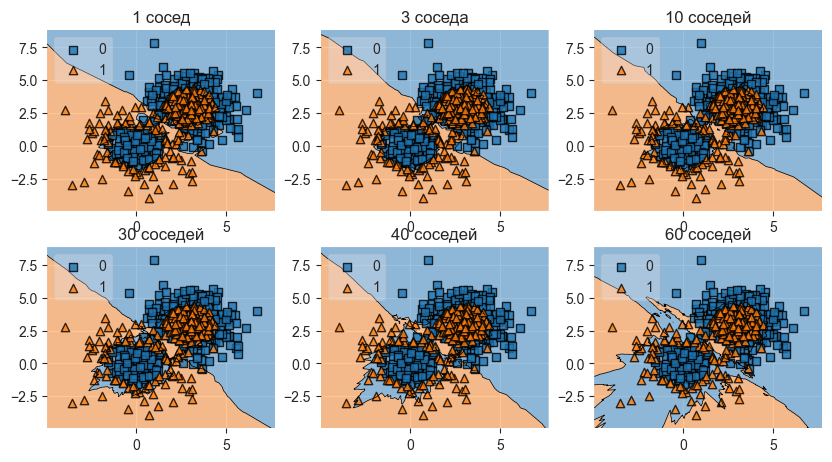

In [36]:
gs = gridspec.GridSpec(3, 3)

fig = plt.figure(figsize=(10,8))

labels = ['1 сосед', '3 соседа', '10 соседей', '30 соседей', "40 соседей", "60 соседей"]
for model, lab, grd in zip(classifier,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    model.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array(X), y=np.array(Y, dtype = "int"), clf=model, legend=2)
    plt.title(lab)

plt.show()



1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [30]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [14]:
for k in [1, 5, 10]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    print(f"Accuracy test для {k} соседей: {np.mean(model.predict(X_test) == y_test).round(3)}")







Accuracy test для 1 соседей: 0.438
Accuracy test для 5 соседей: 0.443
Accuracy test для 10 соседей: 0.47


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
for k in [1, 5, 10]:
    pipe = Pipeline([('scaler', StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))])
    pipe.fit(X_train, y_train)
    print(f"Accuracy test для {k} соседей: {np.mean(pipe.predict(X_test) == y_test).round(3)}")

Accuracy test для 1 соседей: 0.565
Accuracy test для 5 соседей: 0.63
Accuracy test для 10 соседей: 0.661


**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [17]:
### Your code is here
pipe_p = Pipeline([('scaler', StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=10, p=1))])
pipe_p.fit(X_train, y_train)
print(f"Accuracy test для 10 соседей и параметра р=1: {np.mean(pipe_p.predict(X_test) == y_test).round(3)}")




Accuracy test для 10 соседей и параметра р=1: 0.661


**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [18]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [21]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

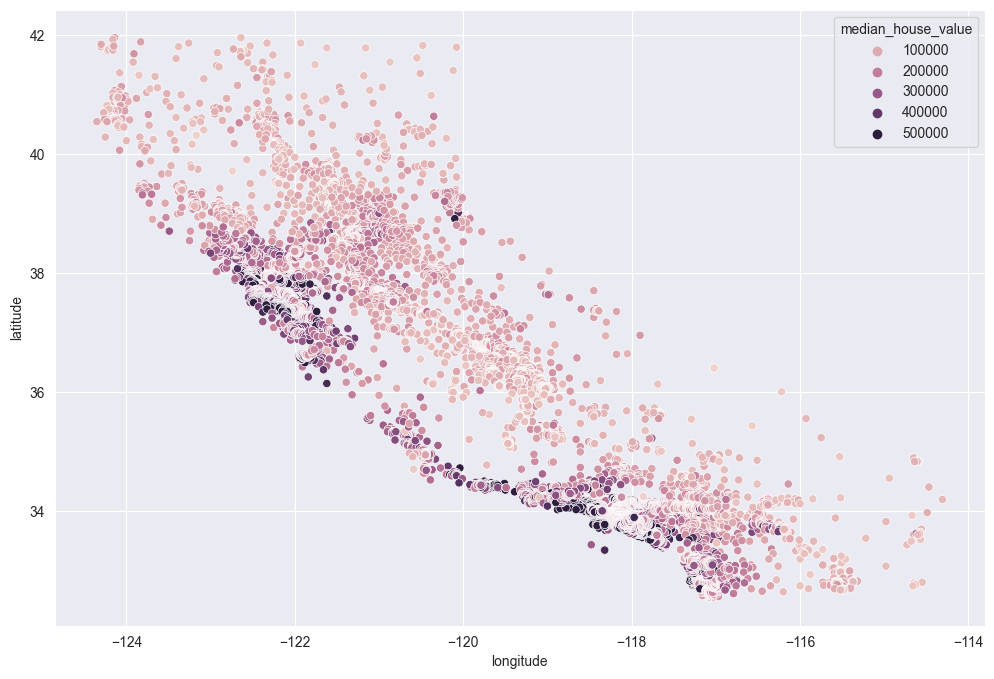

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=True, random_state=2022)
sns.scatterplot(x=X["longitude"], y=X["latitude"], hue=y)

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print (f"RMSE: {(np.mean((y_pred - y_test)**2).round(3))**(1/2) }")

RMSE: 98369.87709657871


In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
param_grid = {
    "KNN__n_neighbors": [x for x in range (1, 10)]}

pipe = Pipeline([('scaler', StandardScaler()), ("KNN", KNeighborsRegressor())])


search = GridSearchCV(pipe, param_grid, scoring='neg_root_mean_squared_error')

search.fit(X_train, y_train)

print(f"Best parametr (CV score = {-search.best_score_:.5f}):")
print(search.best_params_)

Best parametr (CV score = 53891.06594):
{'KNN__n_neighbors': 5}


In [38]:
fig = plt.figure()
fig.set_size_inches(16, 10)


for h in np.arange(0.02, 0.1, 0.01):
    def kernel(distances, h=h):
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1/2) * ((distances)**2) / h**2

        return const * np.exp(power)
    knn = KNeighborsRegressor(n_neighbors=5, weights=kernel)
    knn.fit(X_train, y_train)
    print (f" для {h} RMSE равно {(np.mean((knn.predict(X_test)- y_test)**2).round(3))**(1/2) }")

 для 0.02 RMSE равно 52313.5709311647
 для 0.03 RMSE равно 52306.432906431306
 для 0.039999999999999994 RMSE равно 52276.2697438331
 для 0.049999999999999996 RMSE равно 52259.04648396295
 для 0.06 RMSE равно 52267.279870708786
 для 0.06999999999999999 RMSE равно 52285.653914644696
 для 0.07999999999999999 RMSE равно 52303.94026281385
 для 0.09 RMSE равно 52319.06250583051


<Figure size 1600x1000 with 0 Axes>